# How has Covid-19 affected CA?
In this notebook we will walk you through some examples for you to analyze some data regarding COVID-19 in your home state (CA).

### Table of Contents
1. Importing libraries and executing necessary functions
2. Analyzing the data.

## 1. Importing Libraries and Executing Functions

In [1]:
# RUN THIS CELL TO IMPORT THE NECESSARY LIBRARIES
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import os
import us
import glob
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# RUN THIS CELL TO EXECUTE THIS FUNCTION -- WE WILL USE LATER :)

colors = ['red', 'blue', 'green']
def plot_top3(colors, top3_list, df,minCases =25, maxCases=100000, sample=10):
    
    for i, county in enumerate(top3_list):
        
        selectCounty = df[df['county'] == county]
        inRange = selectCounty[(selectCounty['cases'] > minCases)
                               & (selectCounty['cases'] <= maxCases)]
        
        
        colTitle = 'Days since ' + str(minCases) + 'th Case'
        inRange[colTitle] = np.arange(len(inRange))
        inRange_sample = inRange.sample(sample)

        
        fig2, ax2 = plt.subplots(figsize = (10,8))
        inRange_sample.plot(x=colTitle, y = 'cases',
                    kind='scatter', legend=county, ax=ax2,
                    s=15.0, color=colors[i])
        plt.xticks(size=13)
        plt.yticks(size=13)
        plt.xlabel(xlabel= colTitle, fontsize=20)
        plt.ylabel(ylabel= 'Cases', fontsize=20)
        title =  myState +  ' COVID-19 cases for ' +  county + ' county'
        plt.title(title, fontsize=20)
        plt.axhline(y=minCases, color='magenta', linestyle='--')
        legTitle = 'y = ' + str(minCases) + ' Cases'
        plt.legend([legTitle, 'Cases Recorded on given Day'],
                  prop={'size': 15})
        

In [3]:
# RUN THIS CELL TO EXECUTE THIS FUNCTION -- WE WILL USE LATER :)

# get the right estimate for how many cases there is in those counties

def estimateCases(counties):
    """
    This function estimates the number
    of cases in the given list of counties.
    top 3 cases usually.
    --------------------------------------
    Input:
        counties = list of county names
    Output:
        num = bounding number
    """
    maxCases = []
    minCases = []
    
    for c in top3_housingMIN:
        a = perSTATE[perSTATE['county'] == c]
        numCasesMAX = a['cases'].max()
        numCasesMIN = a['cases'].min()
        maxCases.append(numCasesMAX)
        minCases.append(numCasesMIN)
    
    numMAX = max(maxCases)
    numMIN = min(minCases)
    
    return numMAX, numMIN

## 2. Data
An important aspect of data analysis, is to examine the contents of the data we will be working with. Our data in this notebook will be represented in the form of a table. 
1. Each row represents an instance or record.
2. Each column is a different feature of that particular instance/record.

In this case:

1. Each represents a recorder day. In each of those days several values were acquired, all displayed in columns.
2. These columns contain information on the number of cases recorded on that specific day, the number of deaths due to Covid-19.

In [4]:
# ---------RUN THIS CELL TO LOAD YOUR DATA!--------

# this loads your data into a pandas dataframe (table)
file_data = '../../data/US_counties_COVID19_health_weather_data.csv.zip'
data = pd.read_csv(file_data)

# cleaning data 
data = data[data.state != 'Virgin Islands']
data = data[data.state != 'Northern Mariana Islands']

## 2.1 What is in this dataset?
The data we present to you today depicts COVID-19 data recorded each day at various counties from US states.

Don't worry we won't have you analyzing every single state. Just California!

**To give you an idea of how the data looks like, run the cell below.**

*Note: The method `head()` shows you the first 5 rows in the loaded dataset*

In [5]:
# RUN THIS CELL TO TAKE A PEEK AT THE DATA
data.head()

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
3,2020-01-24,Cook,Illinois,17031,1,0.0,no,no,41.840039,-87.816716,...,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333,2020-03-20,2020-03-21
4,2020-01-24,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23


#### What is being displayed above?
As mentioned previously each row is a recorded day.
We see here that the first day on record is January 21st, 2020. Furthermore:
- The data on the first row is from the county of Snohormish
- This county is located in the state of Washington.

In the next cells we will reduce the data size to only include information about the state of california and its counties.

## 3. California

In the cell below write the name of the state of California next to the variable `myState`, in place of the `# YOUR CODE HERE`. Make sure you do not abbreviate, and you this variable is a string.

In [6]:
myState = 'California'# YOUR CODE HERE

Double-click __here__ for the solution.

<!-- Your answer is below:

myState= 'California'

-->

#### What counties are present in the data?

In [7]:
# RUN THIS CELL TO FIND OUT
CA_data = data[data['state'] == myState]
CAcounties = np.unique(CA_data['county'])

countyDF = pd.DataFrame()
countyDF['Counties in this State'] = CAcounties
countyDF

,Counties in this State
0,Alameda
1,Alpine
2,Amador
3,Butte
4,Calaveras
5,Colusa
6,Contra Costa
7,Del Norte
8,El Dorado
9,Fresno


## 4. Select your County
Type the string value of your county below. This string should be `myCounty` variable. This is case sensitive.

In [9]:
myCounty ='Los Angeles'  # YOUR CODE HERE

Double-click __here__ for the solution.

<!-- Your answer is below:

(Assuming your county is Alameda)
myCounty= 'Alameda'

-->

## 5. How has COVID-19 affected your selected location?
Note that the dates below run from mid-March to early December of 2020.

*Note that the graph to be displayed below only shows the data of your county after the 25th COVID-19 infection, all the way to the 400,000th case*.

In [10]:
CA_simplified = CA_data[['date', 'county', 'cases']]
CA_simplified = CA_simplified[(CA_simplified['cases'] >= 25) & (CA_simplified['cases'] <= 400000)]

In [11]:
CA_county = CA_simplified.groupby('county')
yourCounty = CA_county.get_group(myCounty)
yourCounty['Days since 25th Case'] = np.arange(len(yourCounty))
yourCounty = yourCounty.sample(50) # only sampling 50 data points
yourCounty = yourCounty.sort_index(axis=0)

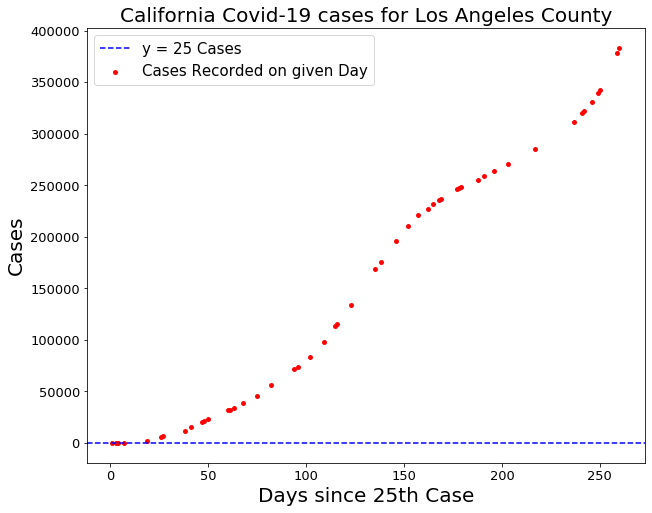

In [12]:
f, a = plt.subplots(figsize=(10,8))
yourCounty.plot(x='Days since 25th Case', y = 'cases',
               kind='scatter', legend='county', ax = a,
               s = 15.0, color='red')
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel(xlabel='Days since 25th Case', fontsize=20)
plt.ylabel(ylabel='Cases', fontsize=20)
title = myState + ' Covid-19 cases for ' + myCounty + ' County'
plt.title(title, fontsize=20)
plt.axhline(y=25, color='blue', linestyle='--')
plt.legend(['y = 25 Cases', 'Cases Recorded on given Day'],
          prop={'size': 15})

## 6. Exercise
1. Fit the $x,y$ coordinates from the graph displayed above to fit this data into Desmos.
    1. First run the cell below to obtain the .csv file.
    2. Download it, and copy paste the coordinates into Desmos.
    3. Once you have finished come back to this notebook to answer the questions below.

In [ ]:
# RUN THIS CELL TO SAVE YOUR CSV of X,Y coordinates
yourCounty = yourCounty[['Days since 25th Case', 'cases']]
fileName = '../../data/myCSVS/CA_' + myCounty + '_cases.csv'
yourCounty.to_csv(fileName)

### Questions:
1. What is the function that best approximates your data?
2. What do you think is the aspect of the change of slope in the data?
3. Why don't you think the graph is a uniform increase or decrease?

*Click on the cell (markdown) below to write your answers below.*

### Your answers here:

1.


2.


3.



## Congratulations, you have completed your first data analysis exercise!

Now that you are done, make sure you save your work (**after you have made a copy**) of this colab notebook in your google drive folder. 